# Module 1 Project - King County House Sales Data

The purpose of this project is to construct a multiple linear regression model that can be used to predict the house prices. I will use the King County House Sales dataset to construct my model. My approach for this project is to follow the OSEMN framework. The steps of this framework is as follow - 

1. Obtain the data
2. Scrub the data
3. Explore the data
4. Model the data
5. Interpret the data

While I am scrubbing and exploring the data, I will build temporary models to check the important paramenters such as coefficient of correlations, coefficient of determination, mean squared error etc. By doing so, I can realize how cleaning and fine tuning the data can change these parameters. 

As part of data scrubing, I will also provide my reasoning of why I am removing certain rows, eliminating certain features, coverting datatypes etc.


# Obtaining Data

My first step is to import various tools to import, scrub and analyze the data.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Removing warning messages
import warnings
warnings.filterwarnings('ignore')

Next, I will fork the Mod1 project repo from Learn github and clone it using the Git Bash. Once the files are in my jupyter, I use pandas to import the King County House Sales dataset into my juypter notebook.

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Scrubing Data - Missing Values

The next step is to get familiar with the dataset and see if there are any anomalies. 

In [3]:
# Checking the first 5 rows of the dataset

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I will copy and paste the column descriptions from column_names.md file for future reference.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [4]:
# Checking to see if any column has missing values
# Notice date and sqft_basement have object datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

It looks like the columns 'waterfront', 'view' and 'yr_renovated' has missing values. I will continue to dig deeper into these 3 columns and see how to handle the missing values.

In [6]:
# Checking the 5 points summary of 'waterfront'
df[['waterfront']].describe()

,waterfront
count,19221.000000
mean,0.007596
std,0.086825
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


The 5-points summary of waterfront shows that only the maximum value is 1 while the other percentiles are 0. It looks like this column contains binary data where yes = 1 and no = 0. Let's confirm with a histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286DA8974C8>]],
      dtype=object)

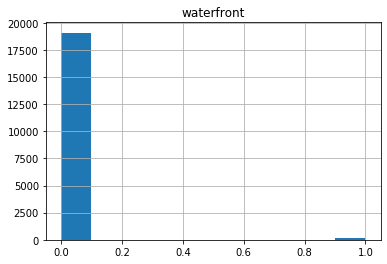

In [7]:
df.hist(column='waterfront')

The histogram of 'waterfront' shows that the majority of the entries have 0 and a few of them have 1. There are no other values. This confirms that 'waterfront' contains binary data.

Now, I will check if waterfront plays an important role in housing prices. I will check this by creating multiple scatter plots where I will put bedrooms, bathrooms, sqft_living, sqft_lot, condition and grade on the X axis and  price on the Y axis. In addition, I will use different colors for the markers based on the waterfront values (0 and 1) to investigate its distribution.

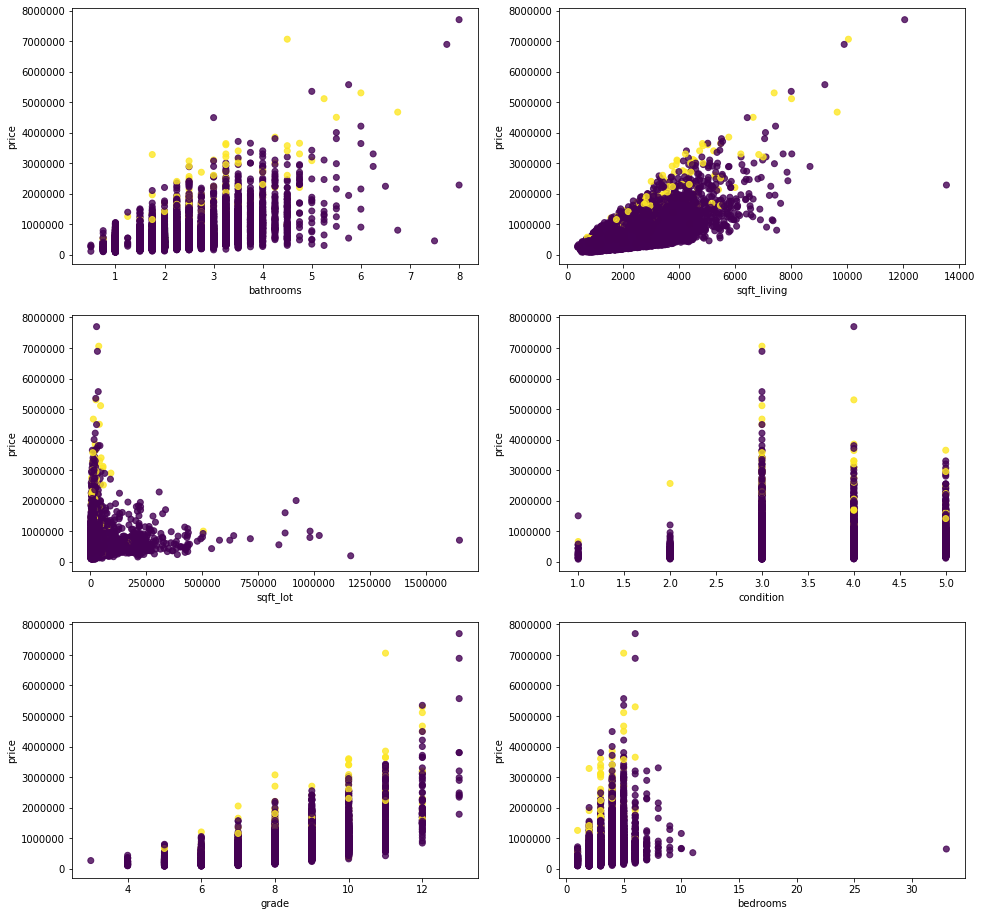

In [8]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade']
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,16))

for i, column in enumerate(columns):
    x = df[column]
    y = df['price']
    row = (i-1)//2
    col = i%2-1
    ax[row, col].scatter(x,y, alpha=0.8, c=df['waterfront'].values)
    ax[row, col].set_ylabel('price')
    ax[row, col].set_xlabel(column)
    
plt.show()


The scatter plots show that the distribution waterfront properties (yellow dots) corresponds to higher y values than non-waterfront properties (purple dots). This tells me that waterfront might be a important factor in setting the property prices. 

Next, I will check what percentage is the waterfront properties in the total population.

In [9]:
# Splitting the data by the waterfront value
df_waterfront = df[df['waterfront']==1]
df_non_waterfront = df[df['waterfront']!=1]

# Calculating the percentage
print(len(df_waterfront)/len(df_non_waterfront))

0.006806209500722577


Looks like the waterfront properties make up only 0.6% of the total number of properties. Since this is a very small percentage, I can replace the missing waterfront values with the mode value of 0.


In [10]:
df['waterfront'] = df['waterfront'].fillna(0.0)

# Checking if there are still missing waterfront values
df['waterfront'].isna().sum()

0

Next step is to work on the missing "view" values. I will check the nature of the data by using a histogram as well as looking at the unique values.

[ 0. nan  3.  4.  2.  1.]


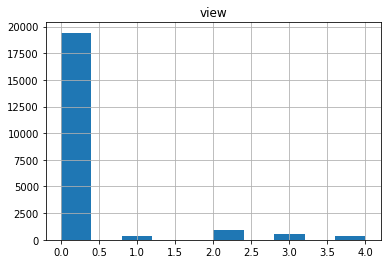

In [11]:
df.hist(column='view')

print(df.view.unique())

The historgram tells me that view has categorical data. Since the number of missing values is only 63 out of 21597 (0.29%), I will replace the missing values with the mode.

In [12]:
# Checking the mode value
print(df['view'].mode())

df['view'] = df['view'].fillna(0.0)

# Checking if there are still missing view values
print(df['view'].isna().sum())

0    0.0
dtype: float64
0


Now, I will check the missing values in the 'yr_renovated' column by using a histogram and a list of unique values.

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


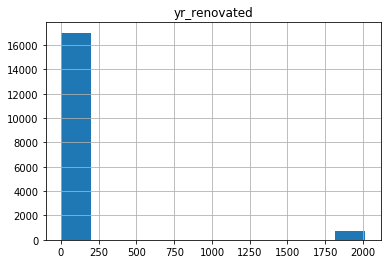

In [13]:
df.hist(column='yr_renovated')

print(df.yr_renovated.unique())

The histogram indicates that the majority of yr_renovated data is 0, i.e. not rennovated. Instead of looking at the year of rennovation, it might makes more sense to change this data into a binary data of renovated = yes or no. 

First, I will replace the missing values with 0 and treat them as properties that were never renovated. After, I will replace all the years into 1 (renovated = yes).

In [14]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Checking if there are still missing view values
print(df['yr_renovated'].isna().sum())

0


In [15]:
# Replacing the years with 1
df['yr_renovated'][df['yr_renovated']!= 0] = 1

# Changing the column name
df = df.rename(columns = {"yr_renovated":"renovated"})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286DB3DF648>]],
      dtype=object)

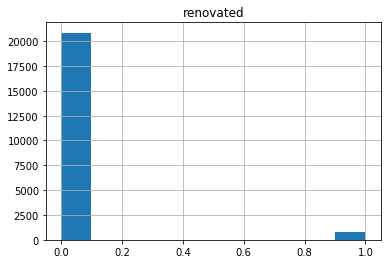

In [16]:
# Checking with the histogram
df.hist(column='renovated')

In [17]:
#checking if there are still missing values in all columns
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
renovated        False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

It looks like all the missing values have been taken care of.

# Scrubing Data - Duplicate Values

The next step is to check if there are duplicate values. Based on the column descriptions, 'id' is the only column that would contain unique values. I will check if there are duplicates in this column.

In [18]:
duplicates = df[df.duplicated(subset='id')]
print(len(duplicates))

177


In [19]:
df.drop_duplicates(subset='id', inplace=True)

#checking the length of the dataframe to see if the duplicates have been dropped
len(df)

21420

# Scrubing Data - Filler/Placeholder Values

In order to find the filler and placeholder values in the data, I will check the top occuring values for each column -

In [20]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n' )

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 


date 
 6/23/2014    0.006629
6/25/2014    0.006116
6/26/2014    0.006116
7/8/2014     0.005929
4/27/2015    0.005882
Name: date, dtype: float64 


price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
Name: price, dtype: float64 


bedrooms 
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016573
6000    0.013352
4000    0.011625
7200    0.010177
7500    0.005509
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492624
2.0    0.382960
1.5    

By quickly checking the top 5 most occuring values, I found that 'sqft_basement' column has ? and 0.0 as placeholder values. The sqft_basement or the square footage of the basement could be an important factor in pricing the houses but 59.37% of its total data is 0.0 (no basement) and 2.11% is unknown  or ?. 

Since the majority of the data is 0 or unknown, I will also change this data into a binary data of basement = yes or no. 

In [21]:
# Replacing the placeholder values with 0
df['sqft_basement'][df['sqft_basement']== '?'] = '0.0'

In [22]:
# Replacing the non-zero values with 1
df['sqft_basement'][df['sqft_basement']!= '0.0'] = 1

In [23]:
# Changing the column name
df = df.rename(columns = {"sqft_basement":"basement"})

In [24]:
# Changing the datatype to float64
df['basement'] = df['basement'].astype(str).astype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286DCBA5BC8>]],
      dtype=object)

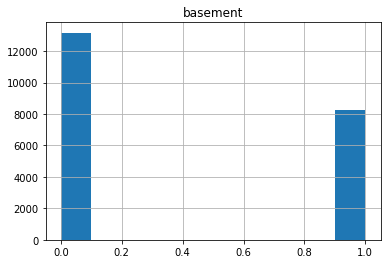

In [25]:
# Checking the histogram
df.hist('basement')

I also noticed that the date feature has many dates as values. This feature might be important because the time when the property was sold can indicate the rate of inflation. However, having too many dates can be messy for my visuals and the model. So, I will remove the day and month from this feature and keep the year only.

In [26]:
df['date'] = pd.to_datetime(df['date'])
df['Yr_sold'] = df['date'].dt.year

#dropping the original date column
df.drop(columns=['date'], inplace=True)

#checking the new column and the dropped column
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yr_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,1.0,1951,1.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


# Creating the Multiple Linear Regression Model

Now that all the missing, duplicate and filler values have been cleaned, I will create the model and investigate its summary.

In [27]:
from statsmodels.formula.api import ols

outcome = 'price'
predictors = df.drop(['price', 'id'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [28]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2649.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:52:50   Log-Likelihood:            -2.9195e+05
No. Observations:               21420   AIC:                         5.839e+05
Df Residuals:                   21400   BIC:                         5.841e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.252e+07   6.66e+06     -7.890      0.000   -6.56e+07   -3.95e+07
bedrooms      -3.642e+04   1909.977    -19.069      0.000   -4.02e+04   -3.27e+04
bathrooms      4.251e+04   3298.073     12.889      0.000     3.6e+04     4.9e+04
sqft_living     152.8352      6.020     25.386      0.000     141.035     164.635
sqft_lot          0.1240      0.048      2.588      0.010       0.030       0.218
floors         7845.6340   3607.471      2.175      0.030     774.721    1.49e+04
waterfront     6.186e+05   1.81e+04     34.121      0.000    5.83e+05    6.54e+05
view           5.302e+04   2129.191     24.903      0.000    4.89e+04    5.72e+04
condition      2.853e+04   2364.667     12.065      0.000    2.39e+04    3.32e+04
grade          9.759e+04   2173.428     44.902      0.000    9.33e+04    1.02e+05
sqft_above       27.5085      6.594      4.172      0.000      14.584      40.433
basement      -3231.4428   5085.331     -0.635      0.525   -1.32e+04    6736.186
yr_built      -2633.5866     72.165    -36.494      0.000   -2775.036   -2492.138
renovated      4.935e+04   7959.890      6.200      0.000    3.38e+04     6.5e+04
zipcode        -586.2729     33.160    -17.680      0.000    -651.269    -521.277
lat             6.04e+05   1.08e+04     56.053      0.000    5.83e+05    6.25e+05
long          -2.177e+05   1.32e+04    -16.454      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.2444      3.458      6.144      0.000      14.467      28.021
sqft_lot15       -0.3848      0.073     -5.247      0.000      -0.529      -0.241
Yr_sold        2.938e+04   2955.074      9.941      0.000    2.36e+04    3.52e+04
==============================================================================
Omnibus:                    18239.756   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1850293.050
Skew:                           3.573   Prob(JB):                         0.00
Kurtosis:                      47.968   Cond. No.                     4.88e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model summary shows that the coefficient of determination (R-squared) and adjusted coefficient of determination (Adj. R-squared) are decent but skewness, kurtosis adn JB score of the residuals are far from decent. In other words, my model's residuals are not following a normal distribution. Plus, there are some predictors with high p-values.

To analyze further, I will use Scikit-Learn functions to create train and test datasets, re-create the model and validate it.

In [29]:
y = df[['price']]
X = df.drop(['id', 'price'], axis=1)

# Importing train_test_split function
from sklearn.model_selection import train_test_split

# Spliting the data into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the length of each data set
print(len(X_train), len(X_test), len(y_train), len(y_test))

17136 4284 17136 4284


In [30]:
# Creating the model by using Scikit-Learn's Linear Regression function
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculating predictions on training and testing datasets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [31]:
# Calculating MSE by using Scikit-Learn's Mean Squared Error function
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 41879173430.99708
Test Mean Squarred Error: 34527672832.95562


In [32]:
# Calculating the percentage of difference between the train and test MSE

print((test_mse-train_mse)/train_mse)

-0.17554072814150168


The MSE of both train and test datasets are very big and test's MSE is 17% less than train's MSE.

### Question 1

##### Will the normality of the residuals (skewness, kurtosis, JB score) improve if outliers are removed from the dataset?
 

# Scrubbing Data - Removing Outliers

Next, I will check if the variables have abnormal outliers by analyzing the 5 point summaries and boxplots of features with continuous data.

In [33]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yr_sold
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,...,1791.170215,0.385201,1971.092997,0.034547,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,2014.318954
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,...,828.692965,0.486654,29.387141,0.182634,53.47748,0.138589,0.140791,685.537057,27345.621867,0.466082
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,...,2220.000000,1.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,1.000000,2015.000000,1.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


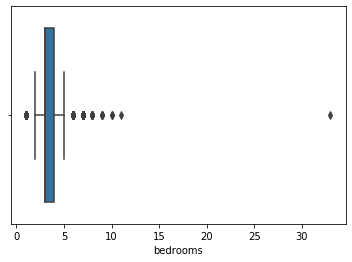

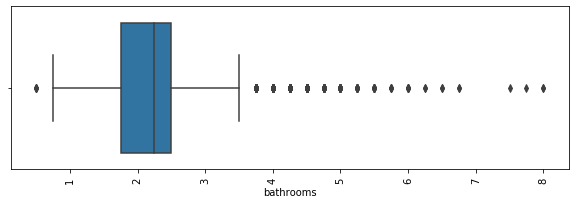

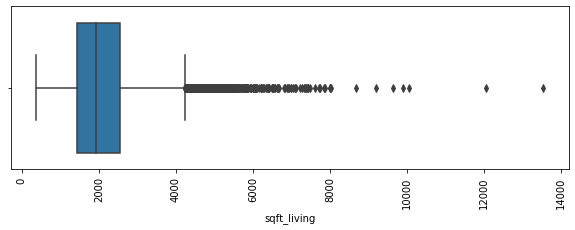

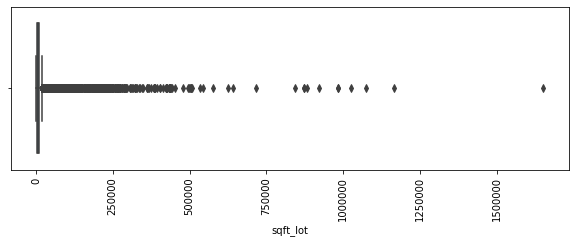

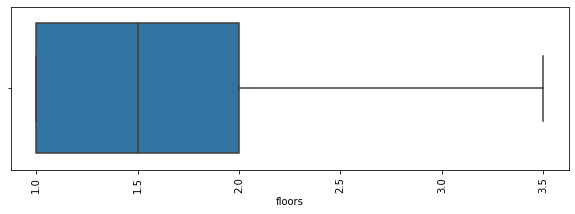

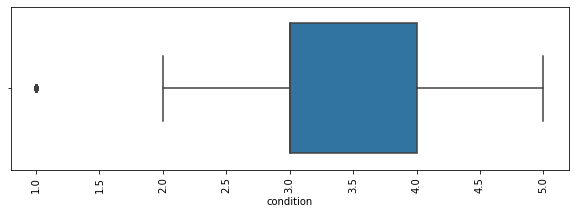

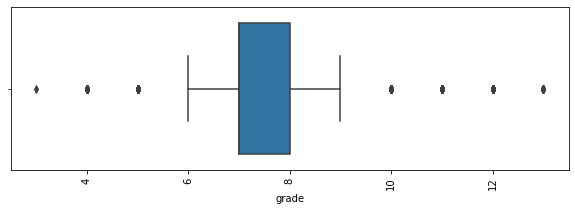

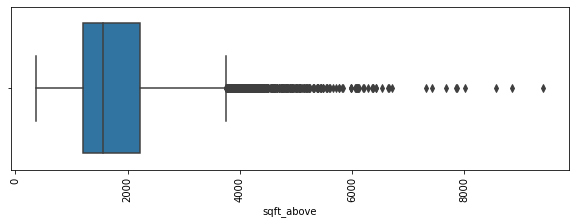

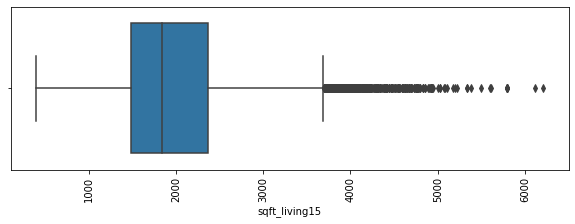

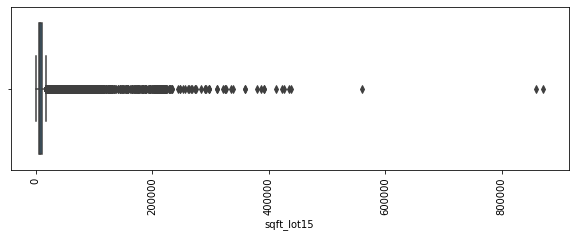

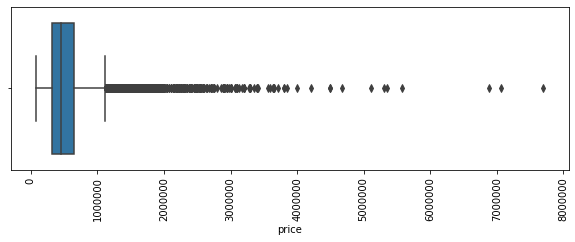

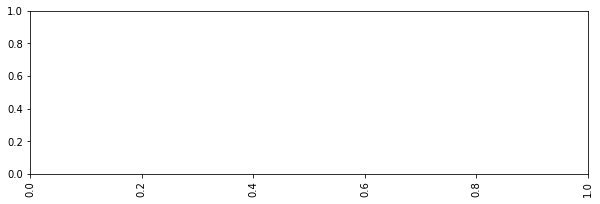

In [34]:
# Making a list of column names that have continuous data
cont_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 
           'sqft_living15', 'sqft_lot15', 'price']

for col in cont_col:
    sns.boxplot(x=col, data=df)
    plt.figure(figsize=(10,3))
    plt.xticks(rotation='vertical')

It looks like most of the variables with the continuous data have outliers. For example, the bedrooms feature has 33 as an outlier. I will remove these outliers since they will cause skewness in my dependent and independent variables and impact my regression model. 

In [35]:
# Setting max and min values

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

In [36]:
# Replacing the outliers with None

for col in cont_col:
    df[col] = df[col].map(lambda x: None if x > upper_range[col] else x)
    df[col] = df[col].map(lambda x: None if x < lower_range[col] else x)

# dropping rows with null values
df = df.dropna()

# Checking if the outliers have been dropped
# Notice the 33 bedrooms is no longer there

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yr_sold
count,1.662000e+04,1.662000e+04,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,...,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.761121e+09,4.544786e+05,3.276835,1.991441,1852.878460,7079.675812,1.464380,0.001023,0.141877,3.420337,...,1593.534296,0.382551,1970.052647,0.028580,98081.783153,47.559965,-122.230699,1822.558664,6951.652587,2014.322082
std,2.868271e+09,1.909207e+05,0.779316,0.649407,636.588494,3402.087029,0.544152,0.031967,0.572209,0.645914,...,598.074014,0.486025,29.621142,0.166628,54.141742,0.139819,0.131518,518.948694,3026.548513,0.467288
min,2.800031e+06,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.000000,0.000000,2.000000,...,480.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.503000,620.000000,651.000000,2014.000000
25%,2.325039e+09,3.074875e+05,3.000000,1.500000,1370.000000,4760.000000,1.000000,0.000000,0.000000,3.000000,...,1150.000000,0.000000,1950.000000,0.000000,98033.000000,47.468300,-122.338000,1440.000000,4837.750000,2014.000000
50%,4.060000e+09,4.200000e+05,3.000000,2.000000,1780.000000,7064.000000,1.000000,0.000000,0.000000,3.000000,...,1450.000000,0.000000,1971.000000,0.000000,98074.000000,47.569800,-122.270000,1730.000000,7198.000000,2014.000000
75%,7.517501e+09,5.650000e+05,4.000000,2.500000,2260.000000,9017.250000,2.000000,0.000000,0.000000,4.000000,...,1920.000000,1.000000,1997.000000,0.000000,98119.000000,47.681725,-122.155000,2140.000000,8770.500000,2015.000000
max,9.900000e+09,1.120000e+06,5.000000,3.500000,4200.000000,19163.000000,3.500000,1.000000,4.000000,5.000000,...,3750.000000,1.000000,2015.000000,1.000000,98199.000000,47.777600,-121.319000,3690.000000,17550.000000,2015.000000


# Scrubbing Data - Categorical Data

My next step is to find out which features contain categorical data. I will do this by looking at the numbers of unique values in each feature and histogram of each feature.

In [37]:
for column in df.columns:
    print(column, '-', df[column].nunique())

id - 16620
price - 3040
bedrooms - 4
bathrooms - 12
sqft_living - 691
sqft_lot - 7022
floors - 6
waterfront - 2
view - 5
condition - 4
grade - 4
sqft_above - 656
basement - 2
yr_built - 116
renovated - 2
zipcode - 70
lat - 4727
long - 611
sqft_living15 - 574
sqft_lot15 - 6176
Yr_sold - 2


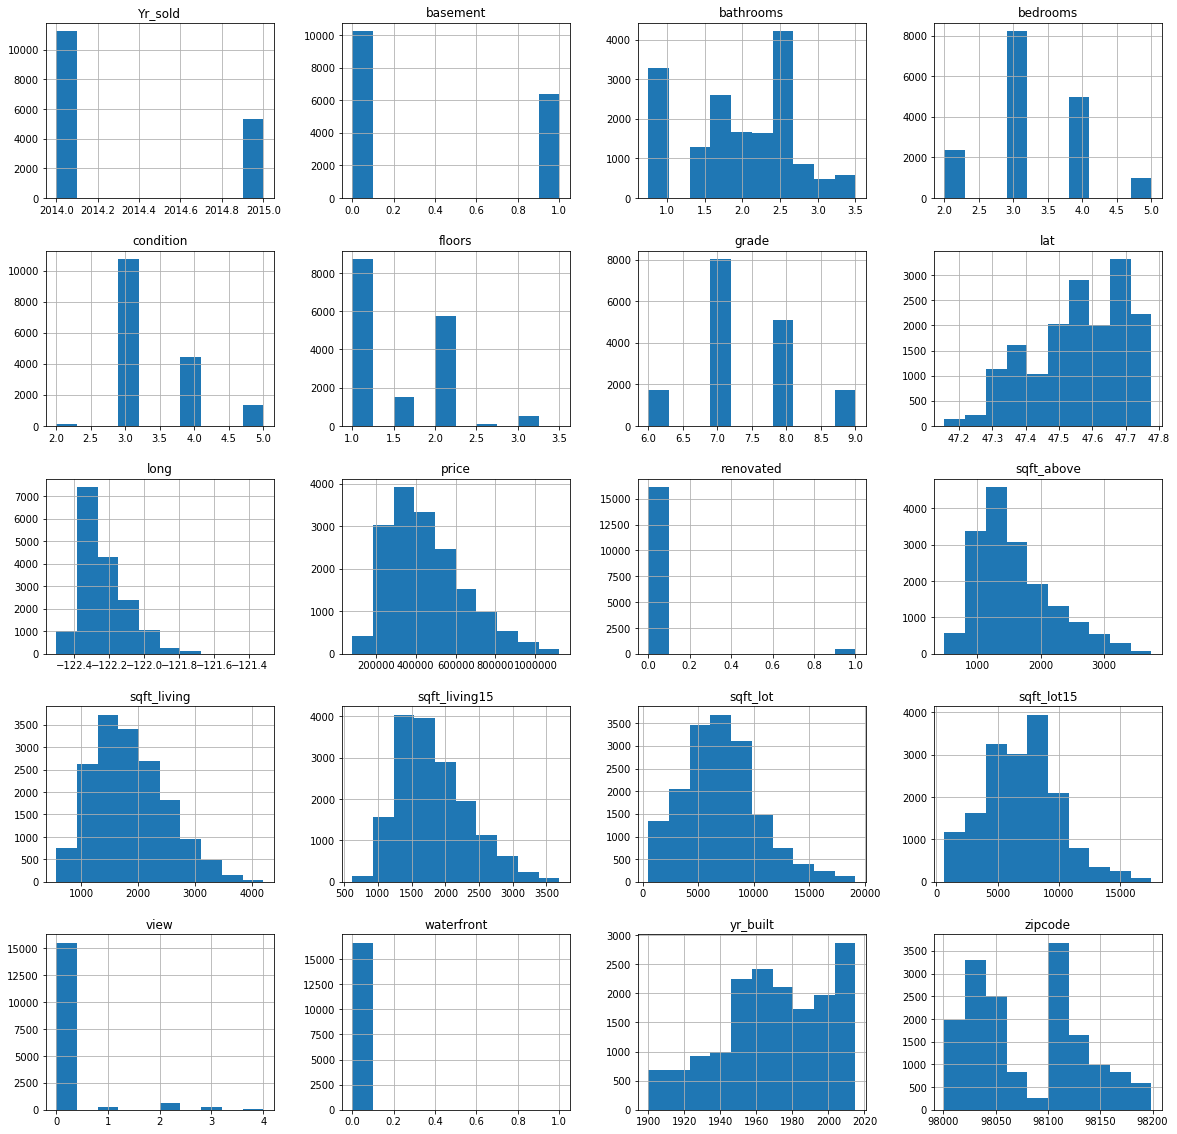

In [38]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(column = df.columns[1:], ax = ax);

The number of unique values and the histograms indicate that bedrooms, bathrooms, floors, waterfront, view, condition and grade have categorical data. However, these features have numeric data and hierarchical orders. For example, 3 bedrooms ranks higher than 2 bedrooms which ranks higher than 1 bedroom. Therefore, I can use these features in my model without performing label encoding or creating dummy variables.

Another categorical feature is zipcode. Unlike the other categorical features, zipcode does not have a hierachical order. Therefore, I should perform one hot encoding in order to include them in the model. However, there are 70 unique zipcodes which is quite a lot to create addition columns. Instead, I will try to put these 70 zipcodes in 10 different bins first and then perform one hot encoding.

In [39]:
#checking the pentiles of zipcode
df['zipcode'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

#creating bins based on the quartiles
bins = [98000, 98008, 98028, 98038, 98053, 98065, 98103, 98115, 98125, 98155, 98200]
bins_zip = pd.cut(df['zipcode'], bins)
bins_zip = bins_zip.cat.as_ordered()
bins_zip.head()

0    (98155, 98200]
1    (98115, 98125]
2    (98008, 98028]
3    (98125, 98155]
4    (98065, 98103]
Name: zipcode, dtype: category
Categories (10, interval[int64]): [(98000, 98008] < (98008, 98028] < (98028, 98038] < (98038, 98053] ... (98103, 98115] < (98115, 98125] < (98125, 98155] < (98155, 98200]]

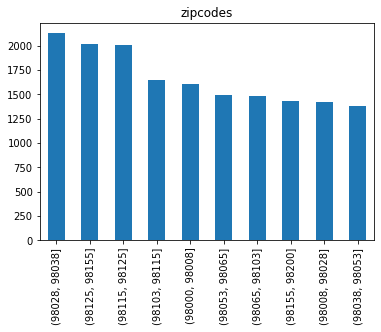

In [40]:
bins_zip.value_counts().plot(kind='bar', title='zipcodes')

In [41]:
# Replace the existing 'zipcode' column
df['zipcode']=bins_zip

# Creating dummy variables, dropping one variable to avoid dummy variable trap
zip_dummies = pd.get_dummies(df['zipcode'], prefix = 'zip', drop_first=True)
zip_dummies

# Dropping the zipcode column
df.drop(columns=['zipcode'], inplace=True)

# Adding the zipcode dummy variables
df = pd.concat([df, zip_dummies], axis=1)

# Checking if the new columns have been added. Now there are 28 columns
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Yr_sold,"zip_(98008, 98028]","zip_(98028, 98038]","zip_(98038, 98053]","zip_(98053, 98065]","zip_(98065, 98103]","zip_(98103, 98115]","zip_(98115, 98125]","zip_(98125, 98155]","zip_(98155, 98200]"
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,...,2014,0,0,0,0,0,0,0,0,1
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,...,2014,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,...,2015,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,...,2014,0,0,0,0,0,0,0,1,0
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,...,2015,0,0,0,0,1,0,0,0,0


In [42]:
# Renaming the zipcode column names to avoid error messages when the model is created

df.rename(columns={'zip_(98008, 98028]':'zip_98008_98028', 'zip_(98028, 98038]':'zip_98028_98038',
       'zip_(98038, 98053]':'zip_98038_98053', 'zip_(98053, 98065]':'zip_98053_98065', 'zip_(98065, 98103]':'zip_98065_98103',
       'zip_(98103, 98115]':'zip_98103_98115', 'zip_(98115, 98125]':'zip_98115_98125', 'zip_(98125, 98155]':'zip_98125_98155',
       'zip_(98155, 98200]':'zip_98155_98200'}, inplace=True)

In [43]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Yr_sold,zip_98008_98028,zip_98028_98038,zip_98038_98053,zip_98053_98065,zip_98065_98103,zip_98103_98115,zip_98115_98125,zip_98125_98155,zip_98155_98200
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,...,2014,0,0,0,0,0,0,0,0,1
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,...,2014,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,...,2015,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,...,2014,0,0,0,0,0,0,0,1,0
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,...,2015,0,0,0,0,1,0,0,0,0


Lat and long values should also be treated as categorical since they do not have hierarchial order. But I already have the zipcode dummy variables to predict the property prices based on the location. So, I will just remove the lat and long features

In [44]:
df.drop(columns=['lat', 'long'], inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Yr_sold,zip_98008_98028,zip_98028_98038,zip_98038_98053,zip_98053_98065,zip_98065_98103,zip_98103_98115,zip_98115_98125,zip_98125_98155,zip_98155_98200
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,...,2014,0,0,0,0,0,0,0,0,1
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,...,2014,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,...,2015,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,...,2014,0,0,0,0,0,0,0,1,0
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,...,2015,0,0,0,0,1,0,0,0,0


So far, I have removed the outliers, created dummies for the zipcodes and removed 2 columns. Let's try to create the model again and see if the scores are improved.

In [45]:
outcome = 'price'
predictors = df.drop(['price', 'id'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [46]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     926.4
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:52:58   Log-Likelihood:            -2.1841e+05
No. Observations:               16620   AIC:                         4.369e+05
Df Residuals:                   16594   BIC:                         4.371e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.073e+07   4.14e+06     -7.422      0.000   -3.88e+07   -2.26e+07
bedrooms         -1.41e+04   1608.863     -8.764      0.000   -1.73e+04   -1.09e+04
bathrooms         1.47e+04   2518.500      5.837      0.000    9764.895    1.96e+04
sqft_living        70.1718      5.069     13.844      0.000      60.236      80.107
sqft_lot           -2.5154      0.602     -4.177      0.000      -3.696      -1.335
floors            1.89e+04   2908.538      6.499      0.000    1.32e+04    2.46e+04
waterfront        2.02e+05   3.08e+04      6.551      0.000    1.42e+05    2.62e+05
view             2.683e+04   1824.655     14.702      0.000    2.33e+04    3.04e+04
condition        2.755e+04   1687.630     16.327      0.000    2.42e+04    3.09e+04
grade            8.697e+04   1793.525     48.492      0.000    8.35e+04    9.05e+04
sqft_above         15.0781      5.507      2.738      0.006       4.284      25.872
basement         2.657e+04   3731.843      7.120      0.000    1.93e+04    3.39e+04
yr_built        -2104.2426     52.741    -39.898      0.000   -2207.620   -2000.865
renovated        3.228e+04   6057.548      5.329      0.000    2.04e+04    4.42e+04
sqft_living15      69.9553      2.971     23.544      0.000      64.131      75.779
sqft_lot15         -3.6073      0.688     -5.246      0.000      -4.955      -2.259
Yr_sold          1.705e+04   2054.903      8.296      0.000     1.3e+04    2.11e+04
zip_98008_98028  -7.65e+04   4531.932    -16.881      0.000   -8.54e+04   -6.76e+04
zip_98028_98038 -3.513e+04   4153.207     -8.457      0.000   -4.33e+04    -2.7e+04
zip_98038_98053  2.039e+04   4595.190      4.438      0.000    1.14e+04    2.94e+04
zip_98053_98065  -8.42e+04   4519.817    -18.630      0.000   -9.31e+04   -7.53e+04
zip_98065_98103  1.393e+04   4621.034      3.014      0.003    4870.568     2.3e+04
zip_98103_98115  4.809e+04   4841.965      9.932      0.000    3.86e+04    5.76e+04
zip_98115_98125  3.262e+04   4618.729      7.063      0.000    2.36e+04    4.17e+04
zip_98125_98155 -1.911e+04   4377.566     -4.366      0.000   -2.77e+04   -1.05e+04
zip_98155_98200 -5.668e+04   4620.943    -12.267      0.000   -6.57e+04   -4.76e+04
==============================================================================
Omnibus:                      602.617   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              941.523
Skew:                           0.340   Prob(JB):                    3.56e-205
Kurtosis:                       3.947   Cond. No.                     4.99e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+07. This might indicate that 

### Answer 1

##### Removing the outliers can improve the normality of the residuals (skewness, kurtosis, JB score).

The new model summary shows that the R-squared and Adj. R-squared scores decrease but the p-value of the features improve.

By removing the outliers, the skew, kurtosis and JB test score of the residuals became significantly lower. This means that the residuals are following closer to a normal distribution. However, the JB score is still quite high.

Let's see how the MSE scores changed.

In [47]:
y = df[['price']]
X = df.drop(['id', 'price'], axis=1)

# Spliting the data into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the length of each data set
print(len(X_train), len(X_test), len(y_train), len(y_test))

13296 3324 13296 3324


In [48]:
# Creating the model by using Scikit-Learn's Linear Regression function
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculating predictions on training and testing datasets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [49]:
# Calculating MSE by using Scikit-Learn's Mean Squared Error function
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 15069209910.270681
Test Mean Squarred Error: 15849976747.591192


In [50]:
# Calculating the percentage of difference between the train and test MSE

print((test_mse-train_mse)/train_mse)

0.051812061944161096


The MSE of both train and test datasets improved. The difference between train and test MSE scores is also lower.

Let's see what else can be done to improve these scores.

### Question 2



#### Can normalization and scaling improve the normality of the residuals?

# Scrubbing Data - Log Transforming the Features

My next step is to check if my variables with continuous data follow a normal distribution. Although it is not a required assumption for the linear regression, normalizing the non-normal independent variables can improve the coefficients of correlation and R-Squared for later use. Let's start by creating KDE plots.

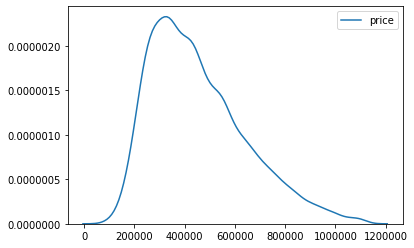

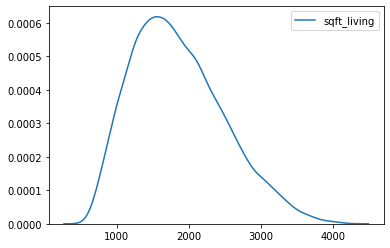

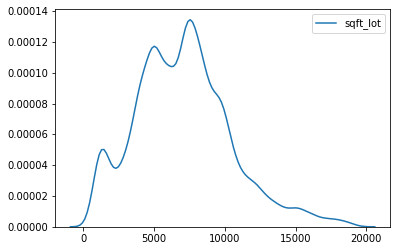

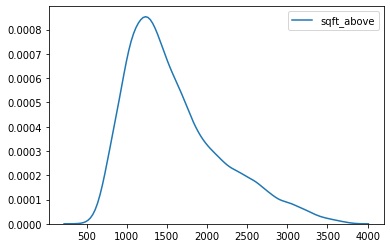

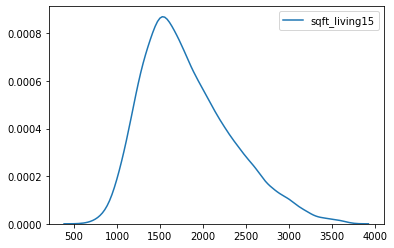

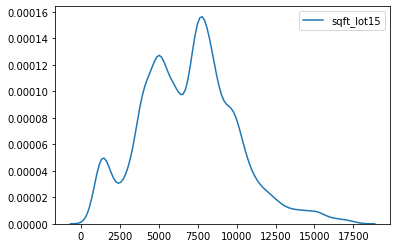

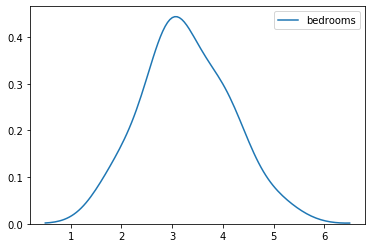

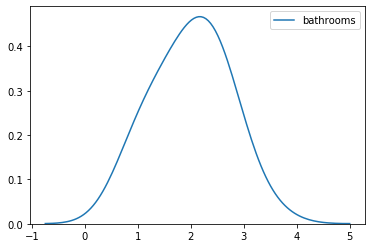

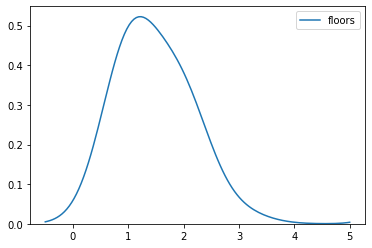

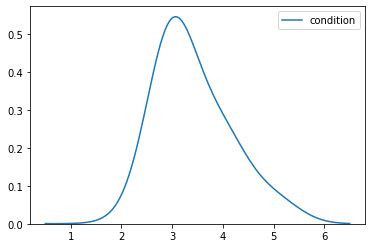

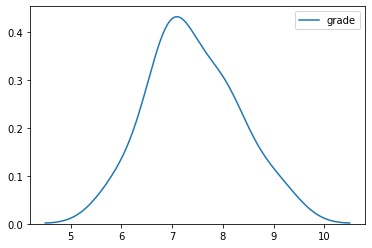

<Figure size 432x288 with 0 Axes>

In [51]:
for col in ['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']:
    sns.kdeplot(df[col])
    plt.figure()
 
for col in ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']:
    sns.kdeplot(df[col], bw=0.5)
    plt.figure()

The KDE plots show that price, sqft_living, sqft_lot, sqft_above, sqft_living15, sqft_lot15 and floor have slight skewness to the right. Sqft_living15 and sqft_lot15 also have multiple modes.

So, I will perform log transformation on these variables.

In [52]:
non_normal = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'floors']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))

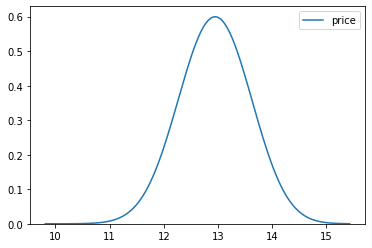

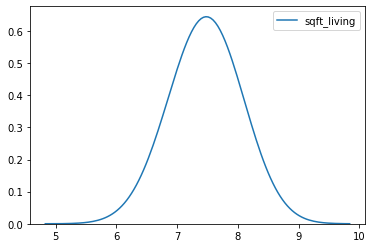

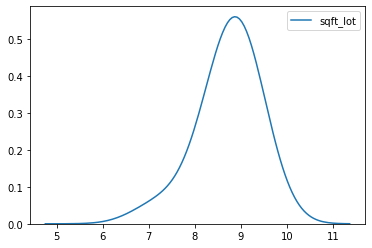

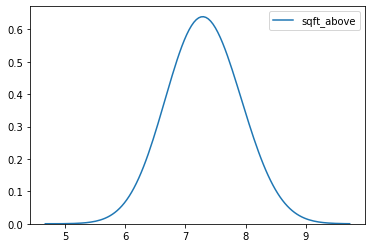

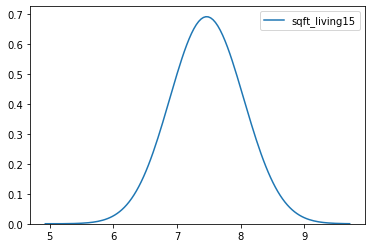

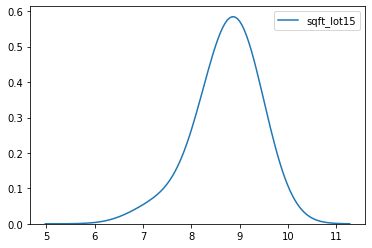

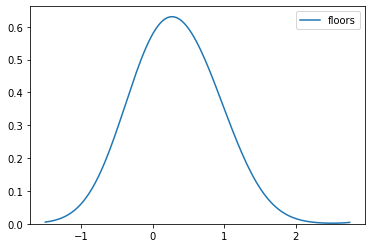

<Figure size 432x288 with 0 Axes>

In [53]:
# Checking the KDE plots again

for col in ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'floors']:
    sns.kdeplot(df[col], bw=0.5)
    plt.figure()

# Scrubbing Data - Scaling the Variables

In [54]:
df['sqft_living'].describe()

count    16620.000000
mean         7.464156
std          0.352858
min          6.327937
25%          7.222566
50%          7.484369
75%          7.723120
max          8.342840
Name: sqft_living, dtype: float64

Now that my independent variables follow a normal distribution, I will move on to scaling them by using min-max scaling method in order to equalize their magnitudes. I will only include the features with continuous data in this process.

In [55]:
# Defining a function for min-max scaling
def scale(column):
    maximum = column.max()
    minimum = column.min()
    y = (column - minimum)/(maximum-minimum)
    return y

scale_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade',
             'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in scale_col:
    df[feat] = scale(df[feat])

In [56]:
# Checking if the features have been scaled

df[scale_col].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_living15,sqft_lot15
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,0.425612,0.451433,0.563908,0.683473,0.253111,0.035469,0.473446,0.470156,0.551762,0.582496,0.681921
std,0.259772,0.236148,0.175124,0.166134,0.281573,0.143052,0.215305,0.270693,0.174820,0.157065,0.165703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.272727,0.444006,0.613870,0.000000,0.000000,0.333333,0.333333,0.425023,0.472443,0.608838
50%,0.333333,0.454545,0.573939,0.723317,0.000000,0.000000,0.333333,0.333333,0.537782,0.575309,0.729457
75%,0.666667,0.636364,0.692432,0.791000,0.553295,0.000000,0.666667,0.666667,0.674358,0.694549,0.789436
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
outcome = 'price'
predictors = df.drop(['price', 'id'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     899.8
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:53:01   Log-Likelihood:                -2124.7
No. Observations:               16620   AIC:                             4301.
Df Residuals:                   16594   BIC:                             4502.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -50.0997      9.230     -5.428      0.000     -68.191     -32.008
bedrooms           -0.0835      0.011     -7.644      0.000      -0.105      -0.062
bathrooms           0.1056      0.016      6.748      0.000       0.075       0.136
sqft_living         0.4747      0.043     10.914      0.000       0.389       0.560
sqft_lot           -0.2079      0.034     -6.182      0.000      -0.274      -0.142
floors             -0.0136      0.014     -0.994      0.320      -0.040       0.013
waterfront          0.4160      0.069      6.055      0.000       0.281       0.551
view                0.1708      0.016     10.583      0.000       0.139       0.202
condition           0.1700      0.011     15.071      0.000       0.148       0.192
grade               0.5482      0.012     45.547      0.000       0.525       0.572
sqft_above          0.2555      0.044      5.792      0.000       0.169       0.342
basement            0.0605      0.009      6.791      0.000       0.043       0.078
yr_built           -0.0043      0.000    -36.694      0.000      -0.005      -0.004
renovated           0.0487      0.014      3.604      0.000       0.022       0.075
sqft_living15       0.5992      0.021     28.077      0.000       0.557       0.641
sqft_lot15         -0.2003      0.032     -6.285      0.000      -0.263      -0.138
Yr_sold             0.0351      0.005      7.660      0.000       0.026       0.044
zip_98008_98028    -0.1290      0.010    -12.767      0.000      -0.149      -0.109
zip_98028_98038    -0.0296      0.009     -3.211      0.001      -0.048      -0.012
zip_98038_98053     0.0728      0.010      7.123      0.000       0.053       0.093
zip_98053_98065    -0.1139      0.010    -11.351      0.000      -0.134      -0.094
zip_98065_98103     0.0854      0.010      8.295      0.000       0.065       0.106
zip_98103_98115     0.1598      0.011     14.852      0.000       0.139       0.181
zip_98115_98125     0.1480      0.010     14.448      0.000       0.128       0.168
zip_98125_98155     0.0423      0.010      4.345      0.000       0.023       0.061
zip_98155_98200    -0.1065      0.010    -10.354      0.000      -0.127      -0.086
==============================================================================
Omnibus:                      142.933   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.372
Skew:                          -0.215   Prob(JB):                     6.04e-33
Kurtosis:                       3.169   Cond. No.                     1.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that 

#### Answer 2

##### Normalization and scaling slightly improve the normality of the residuals.

The JB score decreased from 941.52 to 148.372. Kurtosis of the residuals decreased and the skewness is now negative.

However, R-squared and Adj. R-squared are slightly lower. Although some p-values decreased, the p-value of floors increased tremendously. 

Let's see how the MSE scores has changed.

In [58]:
y = df[['price']]
X = df.drop(['id', 'price'], axis=1)

# Spliting the data into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model by using Scikit-Learn's Linear Regression function
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculating predictions on training and testing datasets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculating MSE by using Scikit-Learn's Mean Squared Error function
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

# Calculating the percentage of difference between the train and test MSE

print((test_mse-train_mse)/train_mse)

Train Mean Squarred Error: 0.07559774726088776
Test Mean Squarred Error: 0.07584758319231268
0.0033048065647079353


The MSE scores of train and test datasets decreased a lot. This is mainly due to the log transformation of the target variable. The good news is the difference between the two MSE scores decreased from 5% to 0.3%. 


#### Question 3

###### Can I improve the R-squared and Adj. R-squared by removing the predictors with poor linearity?

# Exploring Data - Checking Linearity

For my next step, I will check the linearity between the dependent variable ('price') and the independent variables. If there are independent variables with obvious non-linearity, I will remove them from the database since they violate one of the three assumptions of linear regression.

First, I will create a scatter plot for each predictor against the target variable -

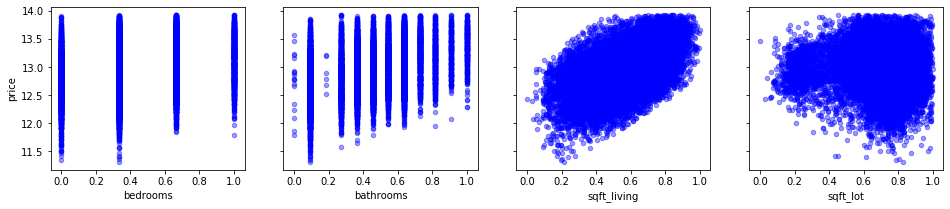

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df.columns[2:6], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b', sharey=True)

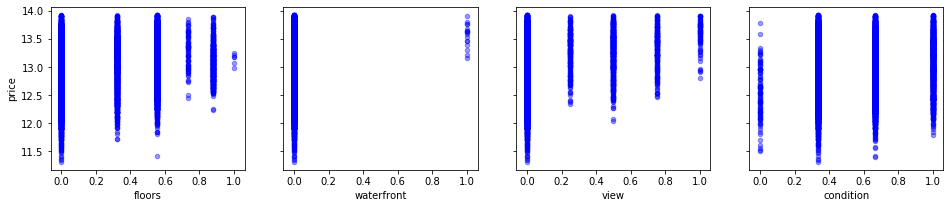

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df.columns[6:10], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b', sharey=True)

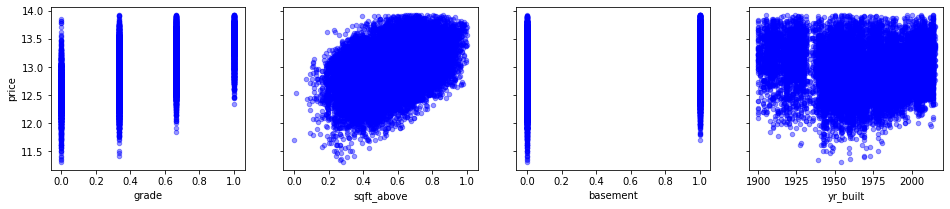

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df.columns[10:14], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b', sharey=True)

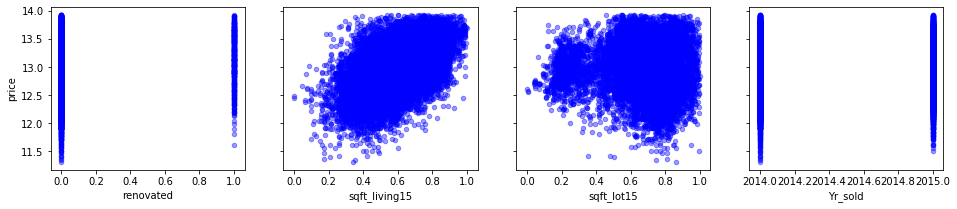

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df.columns[14:18], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b', sharey=True)

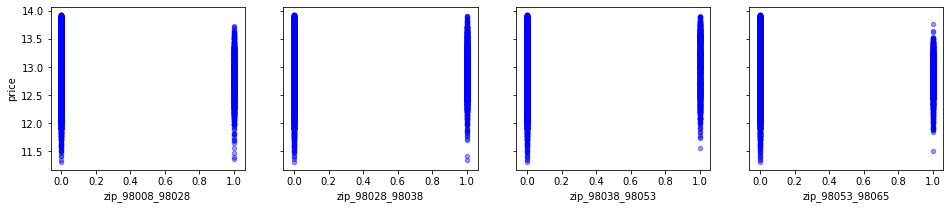

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df.columns[18:22], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b', sharey=True)

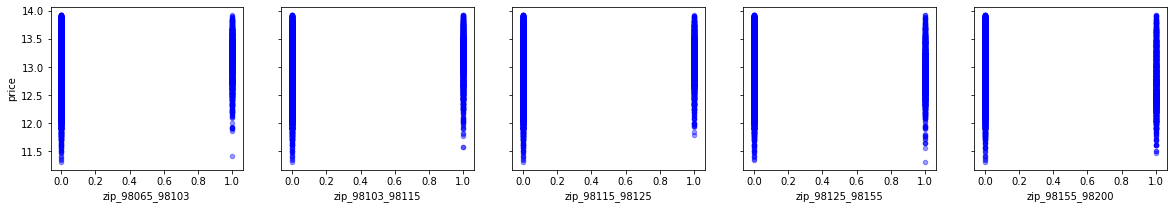

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,3))

for xcol, ax in zip(df.columns[22:27], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b', sharey=True)

The scatter plots shows that - 

* Bedrooms - price seems to increase as the number of bedrooms increases
* Bathrooms - price seems to increase as the number of bathrooms increases
* Sqft_living - shows positive linearity but a lot of variance
* Sqft_lot - a lot of variance along the X and Y axes. I cannot see linearity from the plot.
* Floors - price seems to increase as the number of floors increases
* Waterfront - houses with waterfront view seems to have high prices
* View - price seems to increase as the number of view increases
* Condition - shows slight rises in prices as the condition improves
* Grade - shows slight rises in prices as the grade improves
* Sqft_above - shows  positive linearity but a lot of variance
* Basement - houses with basements seems to have high prices
* Yr_built - a lot of variance along the X and Y axes. I cannot see linearity from the plot.
* Renovated - rennovated houses seems to have high prices
* Sqft_living15 - shows positive linearity but a lot of variance
* Sqft_lot15 - a lot of variance along the X and Y axes. I cannot see linearity from the plot.
* Yr_sold - price seems to be equally distributed between houses sold in 2014 and in 2015. I cannot see linearity from the plot.
* Zipcodes - some zipcode bins show a negative linearity while price is equally distributed for other bins.

Although I can see that some predictors have linearity from these plots, I cannot pick the ones with weak linearity with confidence. To investigate further, I will calculate the coefficient of correleation between each predictor and the target variable.

In [65]:
corr = df.corr()
corr.iloc[1:,1:2]

,price
price,1.000000
bedrooms,0.244270
bathrooms,0.377343
sqft_living,0.524080
sqft_lot,-0.088017
floors,0.240239
waterfront,0.047140
view,0.221742
condition,0.067360
grade,0.542374


Now, I can see that some predictors have very low correlation coefficients and thus, weak linearity. I will drop the predictors that have correlation coefficients less than 0.3.

In [66]:
# checking which correlation coefficients are less than 3
corr = df.corr()
corr.iloc[1:,1:2]<0.3

,price
price,False
bedrooms,True
bathrooms,False
sqft_living,False
sqft_lot,True
floors,True
waterfront,True
view,True
condition,True
grade,False


In [67]:
df.drop(columns=['bedrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'view', 'yr_built', 'renovated', 'sqft_lot15', 
                 'Yr_sold', 'basement', 'zip_98008_98028', 'zip_98028_98038', 'zip_98038_98053', 'zip_98053_98065',
                 'zip_98065_98103', 'zip_98103_98115', 'zip_98115_98125', 'zip_98125_98155', 'zip_98155_98200'], inplace=True)
df.head()


,id,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,7129300520,12.309982,0.090909,0.369910,0.333333,0.437551,0.432092
1,6414100192,13.195614,0.545455,0.756227,0.333333,0.733900,0.562194
2,5631500400,12.100712,0.090909,0.158049,0.000000,0.229897,0.829007
3,2487200875,13.311329,0.818182,0.621749,0.333333,0.380770,0.440398
4,1954400510,13.142166,0.454545,0.545243,0.666667,0.609402,0.597547


In [68]:
outcome = 'price'
predictors = df.drop(['price', 'id'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     2002.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:53:07   Log-Likelihood:                -5326.1
No. Observations:               16620   AIC:                         1.066e+04
Df Residuals:                   16614   BIC:                         1.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.2425      0.011   1142.260      0.000      12.221      12.263
bathrooms        -0.1155      0.016     -7.323      0.000      -0.146      -0.085
sqft_living       1.0377      0.029     35.344      0.000       0.980       1.095
grade             0.6049      0.013     44.832      0.000       0.578       0.631
sqft_above       -0.5660      0.026    -21.527      0.000      -0.618      -0.514
sqft_living15     0.3300      0.024     13.611      0.000       0.282       0.378
==============================================================================
Omnibus:                      137.213   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.562
Skew:                          -0.082   Prob(JB):                     2.40e-22
Kurtosis:                       2.659   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer 3

##### Removing the predictors with poor linearity (-3< coefficient of correlation < 3) did not improve the R-squared or Adj. R-squared scores. It actually decreases the scores by quite a large margin.

However, I will not add the removed predictors back since their individual linearity are very poor and they would spurious correlation to the model.

The JB score and skewness improved but the kurtosis moves away from 3.



In [69]:
y = df[['price']]
X = df.drop(['id', 'price'], axis=1)

# Spliting the data into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model by using Scikit-Learn's Linear Regression function
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculating predictions on training and testing datasets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculating MSE by using Scikit-Learn's Mean Squared Error function
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

# Calculating the percentage of difference between the train and test MSE

print((test_mse-train_mse)/train_mse)

Train Mean Squarred Error: 0.11087627073802654
Test Mean Squarred Error: 0.11224155276324647
0.012313563724070045


The MSE scores of train and test datasets as well as the difference between the two increased.

# Exploring Data - Checking Homoscedasticity and Normality of Residuals

Next, I will check if the remaining predictors violate the two other assumptions of linear regression: if the residuals follow a normal distribution and if dependent variable's variability is equal across values of the independent variable.

King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~bathrooms
-------------------------------------------------------------------------------------


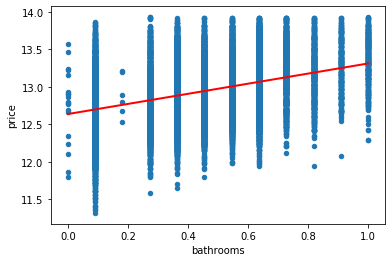

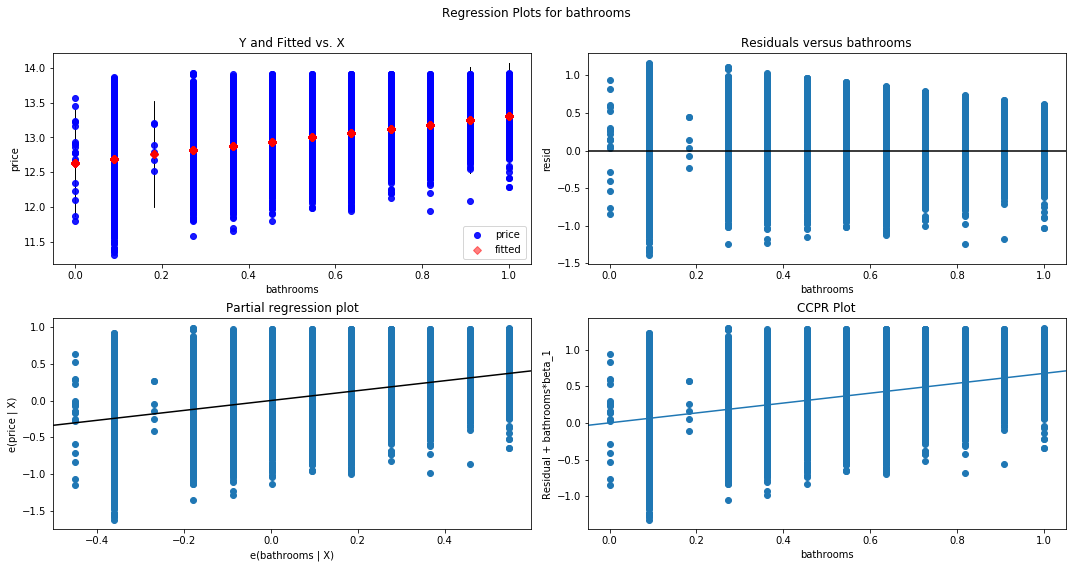

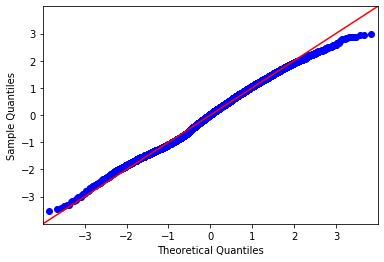

King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_living
-------------------------------------------------------------------------------------


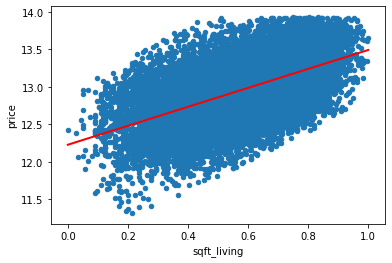

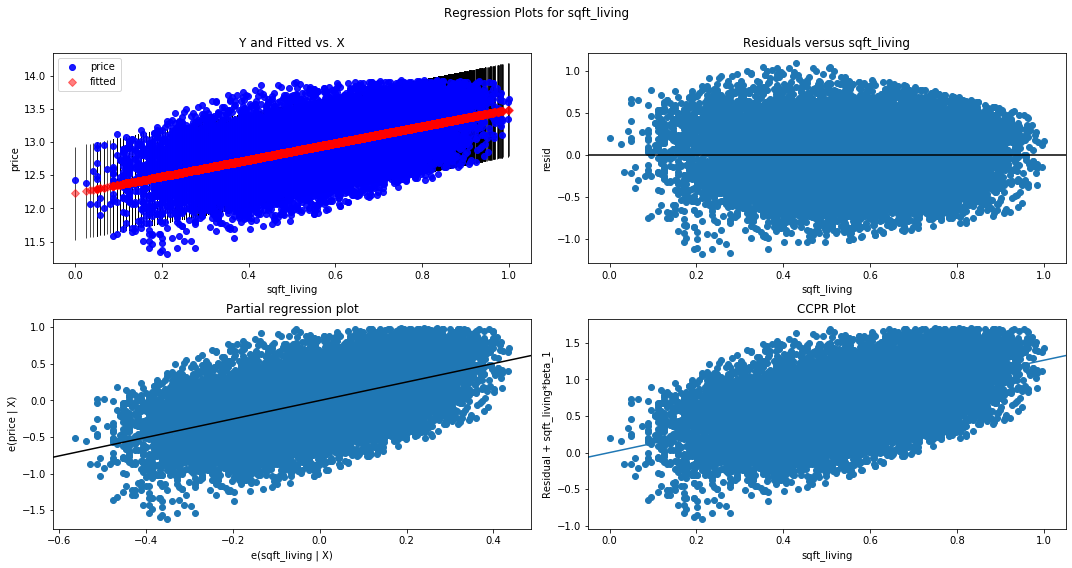

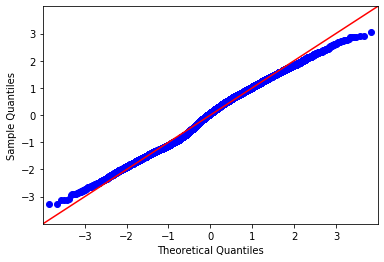

King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~grade
-------------------------------------------------------------------------------------


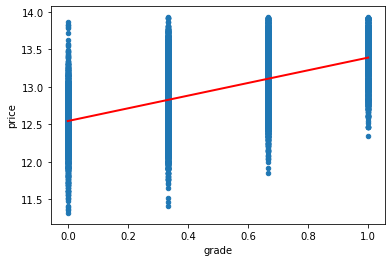

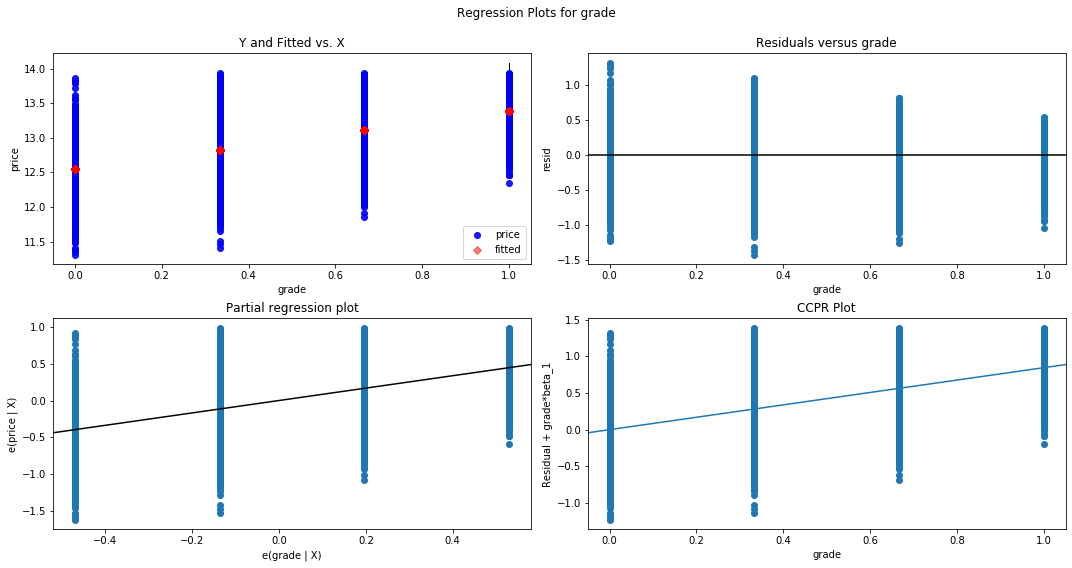

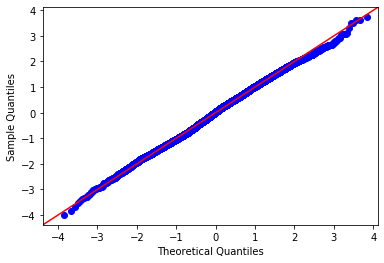

King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_above
-------------------------------------------------------------------------------------


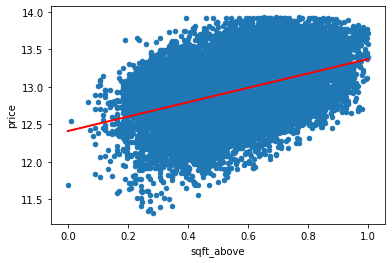

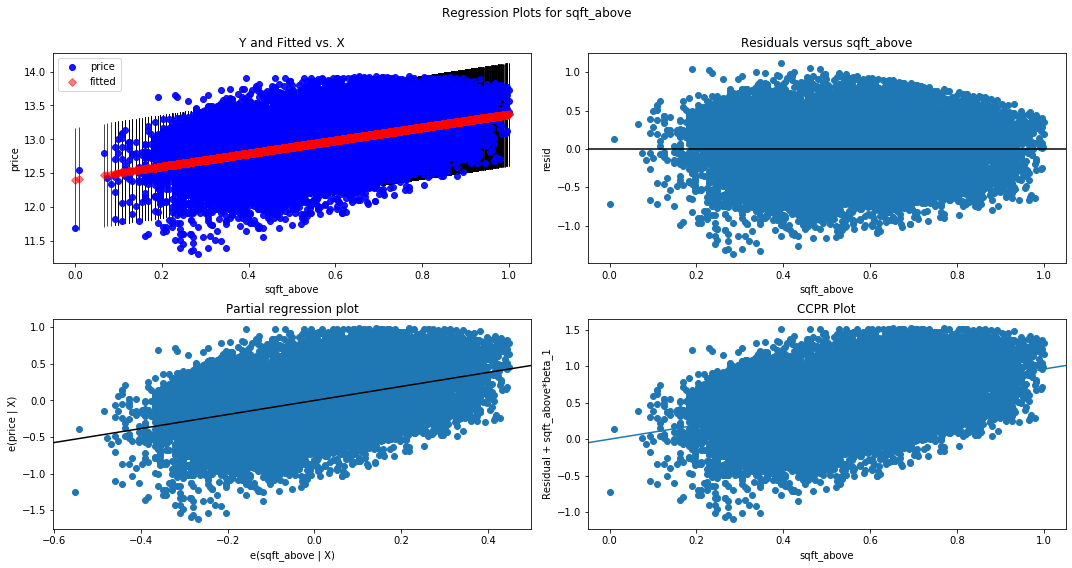

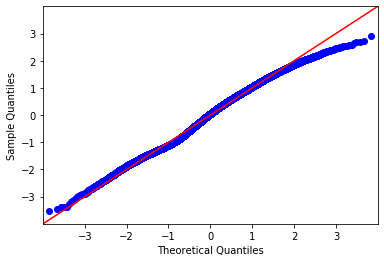

King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_living15
-------------------------------------------------------------------------------------


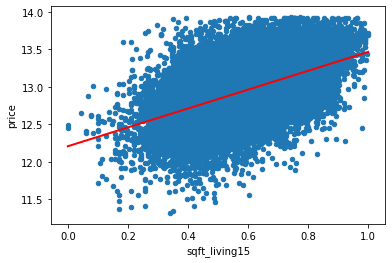

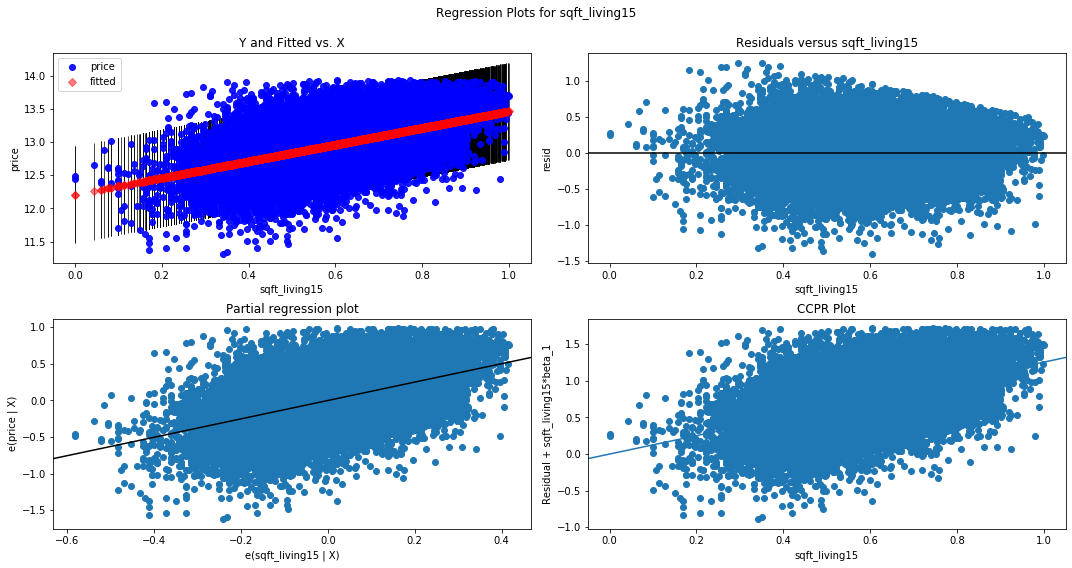

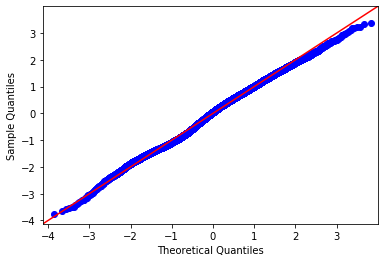

In [70]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]
for idx, val in enumerate(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']):
    print ("King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
#   
    model = smf.ols(formula=f, data=df).fit()
    
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

In [71]:
results = pd.DataFrame(results)
results

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,bathrooms,0.142388,12.6354,0.674373,0,181.791
2,sqft_living,0.27466,12.2276,1.26299,0,264.317
3,grade,0.29417,12.5422,0.845609,0,52.64
4,sqft_above,0.158086,12.4102,0.959846,0,249.92
5,sqft_living15,0.219057,12.2072,1.25761,0,102.875


* The Q-Q plots of all 5 features indicate mediocre normality but the JB scores are far from perfect.
* The residuals vs feature plots show that sqft_living15 has obvious heteroscedasticity. So, I will drop this feature. Sqft_living and sqft_above also shows some signs of heteroscedasticity but I'll keep them for now.
* The coefficients of determination (R-squared) are low but the 0 p-values of all 5 features indicate that there is some relationship between the predictors and the target variable.

In [72]:
# Dropping sqft_living15

df.drop(columns=['sqft_living15'], inplace=True)
df.head()

,id,price,bathrooms,sqft_living,grade,sqft_above
0,7129300520,12.309982,0.090909,0.369910,0.333333,0.437551
1,6414100192,13.195614,0.545455,0.756227,0.333333,0.733900
2,5631500400,12.100712,0.090909,0.158049,0.000000,0.229897
3,2487200875,13.311329,0.818182,0.621749,0.333333,0.380770
4,1954400510,13.142166,0.454545,0.545243,0.666667,0.609402


# Exploring Data - Checking Multicollinearity

Next, I will check if the features are linearly related to one another.

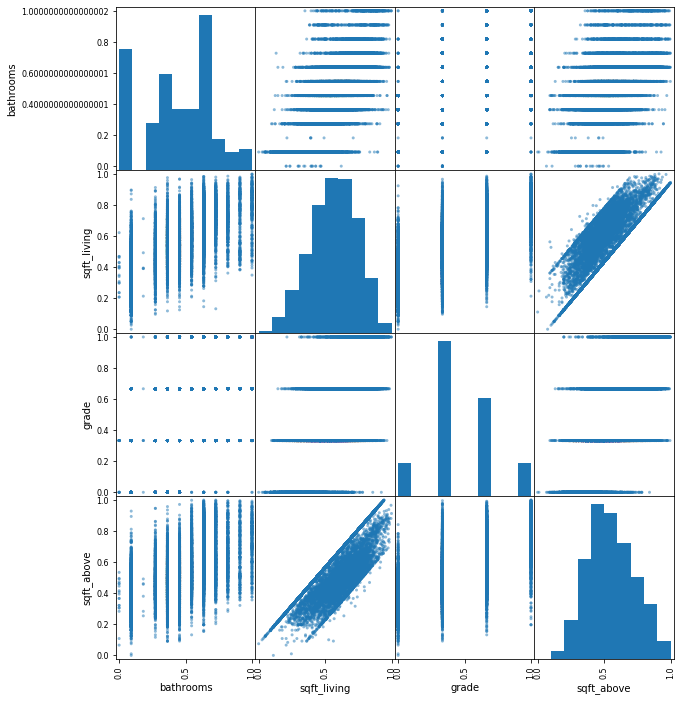

In [73]:
x_cols = ['bathrooms', 'sqft_living', 'grade', 'sqft_above']
pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));

The scatter matrix shows a strong positive linearity between the sqft_living and sqft_above.

In [74]:
# Checking if the correlation between the features are higher than 0.75
df1 = df.iloc[:,2:7]
df1.corr()
abs(df1.corr()) > 0.75

,bathrooms,sqft_living,grade,sqft_above
bathrooms,True,False,False,False
sqft_living,False,True,False,True
grade,False,False,True,False
sqft_above,False,True,False,True


It looks like the correlation between the sqft_living and sqft_above is higher than 0.75. Therefore, I will remove sqft_above in order to prevent multicollinearity. I chose sqft_above because it has a lower coefficient of determination score than sqft_living.

In [75]:
df.drop(columns=['sqft_above'], inplace=True)
df.head()

,id,price,bathrooms,sqft_living,grade
0,7129300520,12.309982,0.090909,0.369910,0.333333
1,6414100192,13.195614,0.545455,0.756227,0.333333
2,5631500400,12.100712,0.090909,0.158049,0.000000
3,2487200875,13.311329,0.818182,0.621749,0.333333
4,1954400510,13.142166,0.454545,0.545243,0.666667


# Exploring Data - Stepwise Selection

Next I will use the stepwise selection method to see which features should be added to my multiple linear regression model. The features with p-values larger than 0.05 will be excluded.

In [76]:
# Dividing the data based on target and predictors

y = df[['price']]
X = df.drop(['id', 'price'], axis=1)

In [77]:
# Copying the stepwise selection function

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [78]:
# Using the stepwise_selection function to see which features should be dropped

result = stepwise_selection(X, y, verbose=True)
print('resulting features:')
print(result)

Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 5.67698e-293
resulting features:
['bathrooms', 'grade', 'sqft_living']


The stepwise selection method shows that all 3 features have less than p-value of 0.05 and should be included in my model. So, I don't have to drop any of the remaining features.

In [79]:
outcome = 'price'
predictors = df.drop(['price', 'id'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     3039.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:53:19   Log-Likelihood:                -5610.3
No. Observations:               16620   AIC:                         1.123e+04
Df Residuals:                   16616   BIC:                         1.126e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2584      0.009   1367.226      0.000      12.241      12.276
bathrooms      -0.1417      0.016     -8.850      0.000      -0.173      -0.110
sqft_living     0.8377      0.022     37.331      0.000       0.794       0.882
grade           0.5807      0.013     45.140      0.000       0.555       0.606
==============================================================================
Omnibus:                      195.111   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.134
Skew:                          -0.059   Prob(JB):                     6.72e-28
Kurtosis:                       2.592   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By dropping sqft_living15 and sqft_above - 
* R-squared and Adj. R-squared decreased slightly
* JB score increased
* Skewness of the residuals improved
* Kurtosis decreased

In [80]:
y = df[['price']]
X = df.drop(['id', 'price'], axis=1)

# Spliting the data into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model by using Scikit-Learn's Linear Regression function
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculating predictions on training and testing datasets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculating MSE by using Scikit-Learn's Mean Squared Error function
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

# Calculating the percentage of difference between the train and test MSE

print((test_mse-train_mse)/train_mse)

Train Mean Squarred Error: 0.11464119209797309
Test Mean Squarred Error: 0.11650108020118345
0.01622355864566454


The MSE scores of the train and test datasets slightly increased. The gap between them also increase by 0.4%.

# Validating with K-Fold Cross Validation

Since the MSEs can vary based on how the data is divided based on the random sampling of train-test split method, I will validate my model again withe the K-Fold method and find out its MSE.

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Calculating the average MSE of 10-fold cross validation
cv_10_results  = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
print("Model's MSE score:", cv_10_results)

Model's MSE score: -0.11512816219453421


The MSE of 10-fold cross validation is a little higher than the train dataset's MSE but lower than test dataset's MSE.

# The Final Multiple Linear Regression Model

In [82]:
# Checking the coefficients
print("Model's intercept:", linreg.intercept_)
print("Model's coefficients:", linreg.coef_)

# Checking the coefficient of determination (R-squared) of the model
print("Model's R-Squared score:", linreg.score(X, y))

Model's intercept: [12.2612464]
Model's coefficients: [[-0.13805139  0.83133711  0.57573708]]
Model's R-Squared score: 0.35422935154025786


In [83]:
# Naming the coefficients
intercept = round(linreg.intercept_[0], 4)
coef_bathrooms = round(linreg.coef_[0][0], 4)
coef_sqft = round(linreg.coef_[0][1], 4)
coef_grade = round(linreg.coef_[0][2], 4)

# Printing the model

Model = 'Y = {} {} B + {} L + {} G'.format(intercept, coef_bathrooms, coef_sqft, coef_grade)

print(Model)
print('''
Y = Price
B = Bathrooms
L = Squared Footage of House
G = Grade''')

Y = 12.2612 -0.1381 B + 0.8313 L + 0.5757 G

Y = Price
B = Bathrooms
L = Squared Footage of House
G = Grade


The R-squared and Adj. R-Squared of my final model are both 0.349. This means that 34.9% of the variations of my target variable (Price) can be explained by the variations of my predictors (Bathroom, Squared Footage of the House and Grade). The 7.6% difference between the train and test datasets indicates that my model might be a little bit overfitted. However, since it is not a big difference, I believe the predictability of my model is acceptable.

# Unscaling the Min-Max Scaled Coefficients

Before interpreting what the coefficient of each independent variable means, I need to un-scale my coefficients since I used min-max scaling for all 3 predictors.

To un-scale, let's look at the change of the target when we change the value of a predictor while holding the remaining predictors constant -

= Target 2 - Target 1

= (Coefficient * Scaled 2) - (Coefficient * Scaled 1) (Note - intercepts and other predictors are cancelled out because they are constants)

= Coefficient * (Scaled 2 - Scaled 1)

= Coefficient * ((((Actual 2 - Min)/(Max - Min)) - ((Actual 1 - Min)/(Max - Min)))

= Coefficient * ((Actual 2 - Min - Actual 1 + Min)/(Max - Min))

= (Coefficient/(Max - Min)) * (Actual 2 - Actual 1)


As per the above calculation, for 1 unit of change in the actual value of a predictor, the independent value will change by coefficient/(max - min) when other predictors are held at constant. So, for my final model, I will divide the coefficient of each predictor by their respective range (max - min).

In [84]:
# Setting the ranges as variables
range_grade = 3
range_bathrooms = 2.75

# Using the maximum and minimum values of log transformed sqft_living
range_sqft = 2.0149

# Calculating new coefficients
coef_bathrooms = round((coef_bathrooms/range_bathrooms), 4)
coef_sqft = round((coef_sqft/range_sqft), 4)
coef_grade = round((coef_grade/range_grade), 4)

# Printing the model

Model = 'Y = {} {} B + {} L + {} G'.format(intercept, coef_bathrooms, coef_sqft, coef_grade)

print(Model)
print('''
Y = Price
B = Bathrooms
L = Squared Footage of House
G = Grade''')

Y = 12.2612 -0.0502 B + 0.4126 L + 0.1919 G

Y = Price
B = Bathrooms
L = Squared Footage of House
G = Grade


# Interpretation of the Coefficients


Now it's time to look at the coefficients of my model and interpret what they mean. Remember that my dependent variable, price, and one independent variable, sqft_living, were log transformed previously. So, the actual final model would be - 

ln(Y) = 12.2612 -0.0502 B + 0.4126 ln(L) + 0.1919 G

Y = Price

B = Bathrooms

L = Squared Footage of House

G = Grade

The intercept is 12.2612. This can be interpreted as when all the independent variables are 0, the price of the property would be e**(12.2612) or 211335. In other words, the average price of an empty lot (no bedroom, no squared footage of the house) is $211,335.

The coefficient of grade is 0.1919. This can be interpreted as for one-unit increase in grade, the price of the house will increase by 21% (e**0.1919 = 1.21) while keeping the other predictors constant. The important caveat here is that the one-unit increase is fixed. If we increase more than one unit, the percentage increase of the price will change.

The coefficient of the bathrooms is -0.0502. This can be interpreted as for 1 unit increase in the number of bathrooms, the price of the house will decrease by 4.9% (e**(-0.0502) = 0.951). This is quite interesting because the price of the house decreases when there are more bathrooms. But we have to remember that this relation arises when we keep the other independent variables constant. So, it means the number of bathrooms is increasing while the grade and the squared footage of the house if fixed. Similar to the grade, we are assuming that the change if fixed at one-unit increase.

The coefficient of squared footage is 0.4126. Like the target variable, this predictor was also log transformed. This coefficient can be interpreted as for 50% change in the squared footage, the price of the house will increase by 18%. Here's the maths - 

= e** (ln(L)*0.4126)

= L **0.4126 (because e **(ln(L)) = L)

= 1.5 **0.4126 (assuming 50% increase)

= 1.18 

Same as the grade and the number of bathrooms, the change in the squared footage is also assumed to be fixed at 100%.

# Reversing the Log Transformation

Just out of curiousity, let's try to revese the log transformation -


ln(Y) = intercept + coef_b * B + coef_l * ln(L) + coef_g * G


- to remove the natural log of the target variable, I will exponentiate the other side of the equation with the base of e or 2.71828.


Y = e**(intercept + coef_b * B + coef_l * ln(L) + coef_g * G)


- applying the multiplication rule and power of a power rule from the laws of exponents


Y = [e** (intercept)] * [(e** coef_b)** B)] * [(e** ln(L))** coef_l] * [(e** coef_g)** G]


- Since e with the power of ln(x) is equal to x,


Y = [e** (intercept)] * [(e** coef_b)** B)] * [L** coef_l] * [(e** coef_g)** G]


Now that we have a new equation, let's apply it to our model.

In [85]:
# Calculating new intercept and coefficient terms
intercept = round(2.71828**intercept, 2)
coef_bathrooms = round(2.71828**coef_bathrooms, 2)
coef_grade = round(2.71828**coef_grade, 2)


In [86]:
# Printing the final model

Model = 'Y = {} * ({}**B) * (L**{}) * ({}**G)'.format(intercept, coef_bathrooms, coef_sqft, coef_grade)

print(Model)
print('''
Y = Price
B = Bathrooms
L = Squared Footage of House
G = Grade''')

Y = 211333.29 * (0.95**B) * (L**0.4126) * (1.21**G)

Y = Price
B = Bathrooms
L = Squared Footage of House
G = Grade


By reversing the log transformation, my model becomes exponential.